<center><h1>Online Shoppers Intention Prediction</h1></center> 

## Midterm project [라월 2022127039]

### Data Source: 
https://www.kaggle.com/datasets/imakash3011/online-shoppers-purchasing-intention-dataset
        
### Data Description: 
데이터 세트는 12,330 세션에 속하는 특징 벡터로 구성된다. 
데이터셋은 특정 캠페인, 특별한 날, 사용자 프로필 또는 기간에 대한 경향을 방지하기 위해 각 세션이 1년 동안 다른 사용자에게 속하도록 구성된다. 
데이터 세트의 12,330개 세션 중 84.5%(10,422개)는 쇼핑으로 끝나지 않는 음의 클래스 샘플이었고, 나머지(1908개)는 쇼핑으로 끝나는 양의 클래스 샘플이다.


### Project Goal
프로젝트 목표는 주어진 기능의 값을 기반으로 온라인 쇼핑객의 의도(_buy_ 또는 _no__buy_)를 예측할 수 있는 중고 기계 학습 분류 시스템이다.

이 프로젝트에 가장 적합한 알고리즘을 선택하기 위해 여러 가지 다른 분류 알고리즘을 시도하고 성능을 비교한다.

In [104]:
import numpy as np
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv("online_shoppers_intention.csv")

In [5]:
df.head(3)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.0,0.0,0.1,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes: bool(

Explanation: *Revenue* and *Weekend* are boolean type, and they can easly be transformed into binary type (0 & 1). 

In [6]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [3]:
print(df.isnull().sum())

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


In [4]:
df.Revenue = df.Revenue.astype('int')
df.Weekend = df.Weekend.astype('int')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null int64
Revenue                    12330 non-null int64
dtypes: flo

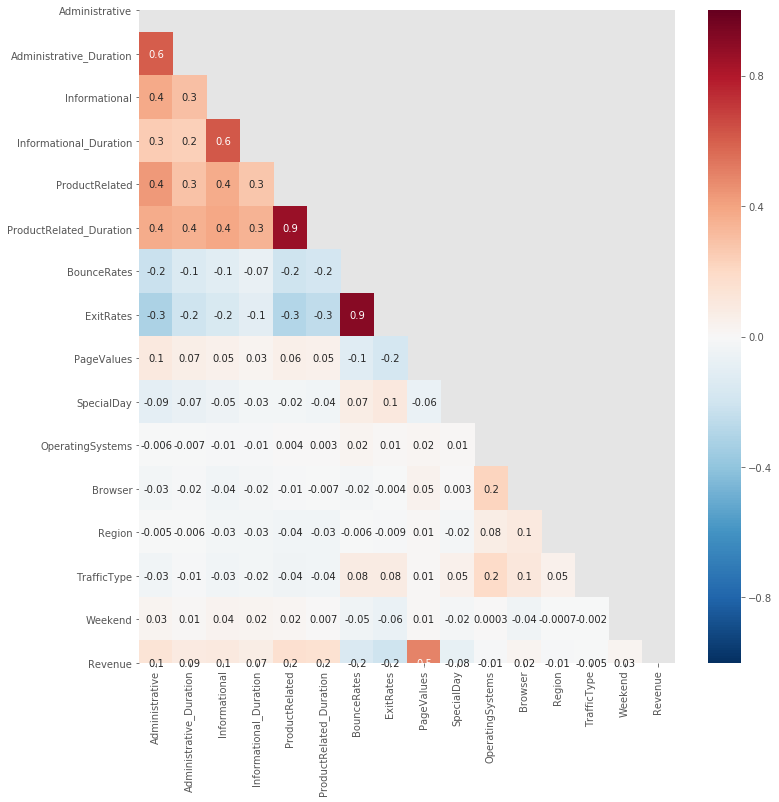

In [10]:
matrix = np.triu(df.corr())
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(df.corr(), annot=True, ax=ax, fmt='.1g', vmin=-1, vmax=1, center= 0, mask=matrix, cmap='RdBu_r')
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


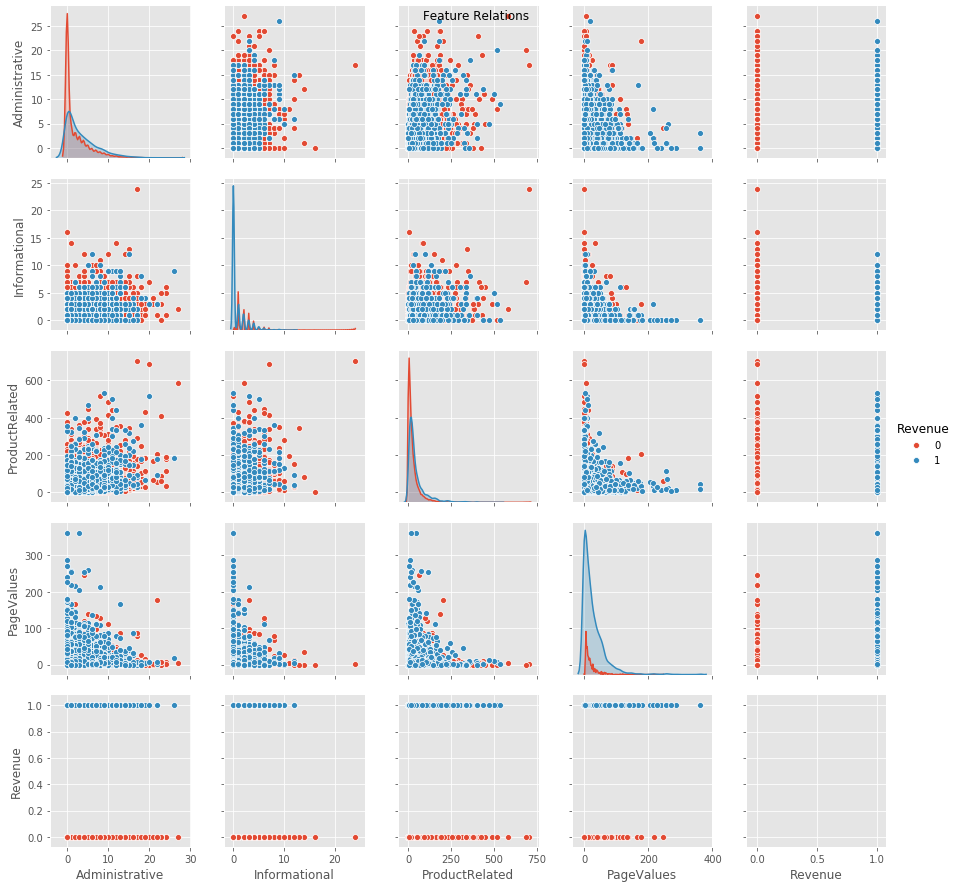

In [11]:
g1 = sns.pairplot(df[['Administrative', 'Informational', 'ProductRelated', 'PageValues', 'Revenue']], hue='Revenue')
g1.fig.suptitle('Feature Relations')
plt.show()

## Step 1 Data Pre-Processing

#### 1.1 Data Transformation

In [5]:
dff = pd.concat([df,pd.get_dummies(df['Month'], prefix='Month')], axis=1).drop(['Month'],axis=1)
dff = pd.concat([dff,pd.get_dummies(dff['VisitorType'], prefix='VisitorType')], axis=1).drop(['VisitorType'],axis=1)
print(dff.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 29 columns):
Administrative                   12330 non-null int64
Administrative_Duration          12330 non-null float64
Informational                    12330 non-null int64
Informational_Duration           12330 non-null float64
ProductRelated                   12330 non-null int64
ProductRelated_Duration          12330 non-null float64
BounceRates                      12330 non-null float64
ExitRates                        12330 non-null float64
PageValues                       12330 non-null float64
SpecialDay                       12330 non-null float64
OperatingSystems                 12330 non-null int64
Browser                          12330 non-null int64
Region                           12330 non-null int64
TrafficType                      12330 non-null int64
Weekend                          12330 non-null int64
Revenue                          12330 non-null int64
Month_Aug    

In [137]:
dff.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1


#### 1.2 Data Split
##### data variables setting : feature is X , target is y

In [6]:
y = dff['Revenue']
X = dff.drop(['Revenue'], axis=1)

In [7]:
X_train, X_valtest, y_train, y_valtest = train_test_split(X, y, test_size=0.3, random_state=101)
X_val, X_test, y_val, y_test = train_test_split(X_valtest, y_valtest, test_size=0.5, random_state=101)

In [8]:
sc_X = StandardScaler()

Xsc_train = sc_X.fit_transform(X_train)
Xsc_val = sc_X.fit_transform(X_val)
Xsc_test = sc_X.fit_transform(X_test)

## Step 2 Model Building

### 2.1 Naive Bayes

In [9]:
nbm = GaussianNB()
nbm.fit(X_train,y_train)
nbm_pred = nbm.predict(X_val)

print('Gaussian Naive Bayes Performance:')
print('---------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_val, nbm_pred))
print('F1 Score        : ', metrics.f1_score(y_val, nbm_pred))
print('Precision       : ', metrics.precision_score(y_val, nbm_pred))
print('Recall          : ', metrics.recall_score(y_val, nbm_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_val, nbm_pred))

Gaussian Naive Bayes Performance:
---------------------------------
Accuracy        :  0.775013520822066
F1 Score        :  0.4914425427872861
Precision       :  0.3941176470588235
Recall          :  0.6525974025974026
Confusion Matrix:
  [[1232  309]
 [ 107  201]]


### 2.2 KNN

In [10]:
knn = KNeighborsClassifier(n_neighbors=5,weights='uniform',leaf_size=30,p=2) #default values
knn.fit(Xsc_train,y_train)
knn_pred = knn.predict(Xsc_val)

print('K-Nearest Neighbor Initial Performance:')
print('---------------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_val, knn_pred))
print('F1 Score        : ', metrics.f1_score(y_val, knn_pred))
print('Precision       : ', metrics.precision_score(y_val, knn_pred))
print('Recall          : ', metrics.recall_score(y_val, knn_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_val, knn_pred))

K-Nearest Neighbor Initial Performance:
---------------------------------------
Accuracy        :  0.8734451054624122
F1 Score        :  0.5021276595744681
Precision       :  0.7283950617283951
Recall          :  0.38311688311688313
Confusion Matrix:
  [[1497   44]
 [ 190  118]]


##### 2.2.1 KNN Tuning

In [11]:
knn_param_grid = {'n_neighbors': list(range(1,30)), 
                  'leaf_size': [1,10,20,30,40,50], 
                  'p': [1,2],
                  'weights': ['uniform','distance']}
knn_grid = GridSearchCV(KNeighborsClassifier(),
                        knn_param_grid,
                        verbose=3)

In [12]:
knn_grid.fit(Xsc_train,y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 696 candidates, totalling 2088 fits
[CV] leaf_size=1, n_neighbors=1, p=1, weights=uniform ................
[CV]  leaf_size=1, n_neighbors=1, p=1, weights=uniform, score=0.842, total=   2.5s
[CV] leaf_size=1, n_neighbors=1, p=1, weights=uniform ................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s remaining:    0.0s


[CV]  leaf_size=1, n_neighbors=1, p=1, weights=uniform, score=0.842, total=   2.6s
[CV] leaf_size=1, n_neighbors=1, p=1, weights=uniform ................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.1s remaining:    0.0s


[CV]  leaf_size=1, n_neighbors=1, p=1, weights=uniform, score=0.840, total=   2.7s
[CV] leaf_size=1, n_neighbors=1, p=1, weights=distance ...............
[CV]  leaf_size=1, n_neighbors=1, p=1, weights=distance, score=0.842, total=   2.2s
[CV] leaf_size=1, n_neighbors=1, p=1, weights=distance ...............
[CV]  leaf_size=1, n_neighbors=1, p=1, weights=distance, score=0.842, total=   2.5s
[CV] leaf_size=1, n_neighbors=1, p=1, weights=distance ...............
[CV]  leaf_size=1, n_neighbors=1, p=1, weights=distance, score=0.840, total=   2.5s
[CV] leaf_size=1, n_neighbors=1, p=2, weights=uniform ................
[CV]  leaf_size=1, n_neighbors=1, p=2, weights=uniform, score=0.842, total=   2.2s
[CV] leaf_size=1, n_neighbors=1, p=2, weights=uniform ................
[CV]  leaf_size=1, n_neighbors=1, p=2, weights=uniform, score=0.835, total=   2.2s
[CV] leaf_size=1, n_neighbors=1, p=2, weights=uniform ................
[CV]  leaf_size=1, n_neighbors=1, p=2, weights=uniform, score=0.832, tota

[Parallel(n_jobs=1)]: Done 2088 out of 2088 | elapsed: 65.6min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'leaf_size': [1, 10, 20, 30, 40, 50],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [13]:
knn_grid.best_params_

{'leaf_size': 1, 'n_neighbors': 6, 'p': 2, 'weights': 'distance'}

In [152]:
knn_grid.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='distance')

In [14]:
knn_grid_pred = knn_grid.predict(Xsc_val)

In [15]:
print('K-Nearest Neighbor Tuned Performance:')
print('-------------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_val, knn_grid_pred))
print('F1 Score        : ', metrics.f1_score(y_val, knn_grid_pred))
print('Precision       : ', metrics.precision_score(y_val, knn_grid_pred))
print('Recall          : ', metrics.recall_score(y_val, knn_grid_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_val, knn_grid_pred))

K-Nearest Neighbor Tuned Performance:
-------------------------------------
Accuracy        :  0.8734451054624122
F1 Score        :  0.5063291139240506
Precision       :  0.7228915662650602
Recall          :  0.38961038961038963
Confusion Matrix:
  [[1495   46]
 [ 188  120]]


### 2.3 SVM

In [16]:
svm = SVC(C=1.0,kernel='rbf',degree=3,gamma='auto_deprecated') #default values
svm.fit(Xsc_train,y_train)
svm_pred = svm.predict(Xsc_val)

print('SVM Initial Performance:')
print('------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_val, svm_pred))
print('F1 Score        : ', metrics.f1_score(y_val, svm_pred))
print('Precision       : ', metrics.precision_score(y_val, svm_pred))
print('Recall          : ', metrics.recall_score(y_val, svm_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_val, svm_pred))

SVM Initial Performance:
------------------------
Accuracy        :  0.8875067604110329
F1 Score        :  0.5856573705179283
Precision       :  0.7577319587628866
Recall          :  0.4772727272727273
Confusion Matrix:
  [[1494   47]
 [ 161  147]]


##### 2.3.1 SVM Tuning

In [156]:
svm_param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [0.1,0.01,0.001,0.0001], 
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid']} 
svm_grid = GridSearchCV(SVC(),
                        svm_param_grid,
                        refit=True,
                        verbose=3)

In [157]:
svm_grid.fit(Xsc_train,y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 80 candidates, totalling 240 fits
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.884, total=   1.5s
[CV] C=0.1, gamma=0.1, kernel=linear .................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.884, total=   1.1s
[CV] C=0.1, gamma=0.1, kernel=linear .................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.6s remaining:    0.0s


[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.886, total=   1.2s
[CV] C=0.1, gamma=0.1, kernel=poly ...................................
[CV] ....... C=0.1, gamma=0.1, kernel=poly, score=0.883, total=   1.4s
[CV] C=0.1, gamma=0.1, kernel=poly ...................................
[CV] ....... C=0.1, gamma=0.1, kernel=poly, score=0.881, total=   1.4s
[CV] C=0.1, gamma=0.1, kernel=poly ...................................
[CV] ....... C=0.1, gamma=0.1, kernel=poly, score=0.884, total=   1.3s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.859, total=   1.6s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.856, total=   1.4s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.859, total=   1.6s
[CV] C=0.1, gamma=0.1, kernel=sigmoid ................................
[CV] .

[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed: 526.3min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [167]:
svm_grid.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [160]:
svm_grid.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [17]:
svm_grid = SVC(C=10,kernel='rbf',degree=3,gamma=0.01) #default values
svm_grid.fit(Xsc_train,y_train)

svm_grid_pred = svm_grid.predict(Xsc_val)

print('SVM Tuned Performance:')
print('----------------------')
print('Accuracy        : ', metrics.accuracy_score(y_val, svm_grid_pred))
print('F1 Score        : ', metrics.f1_score(y_val, svm_grid_pred))
print('Precision       : ', metrics.precision_score(y_val, svm_grid_pred))
print('Recall          : ', metrics.recall_score(y_val, svm_grid_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_val, svm_grid_pred))

SVM Tuned Performance:
----------------------
Accuracy        :  0.8891292590589508
F1 Score        :  0.6003898635477583
Precision       :  0.751219512195122
Recall          :  0.5
Confusion Matrix:
  [[1490   51]
 [ 154  154]]


### 2.4 Logistic Regression

In [174]:
lrm = LogisticRegression(C=1.0,solver='lbfgs',) #default parameters
lrm.fit(X_train,y_train)
lrm_pred = lrm.predict(X_val)

print('Logistic Regression initial Performance:')
print('----------------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_val, lrm_pred))
print('F1 Score        : ', metrics.f1_score(y_val, lrm_pred))
print('Precision       : ', metrics.precision_score(y_val, lrm_pred))
print('Recall          : ', metrics.recall_score(y_val, lrm_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_val, lrm_pred))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression initial Performance:
----------------------------------------
Accuracy        :  0.8777717685235262
F1 Score        :  0.5232067510548523
Precision       :  0.7469879518072289
Recall          :  0.4025974025974026
Confusion Matrix:
  [[1499   42]
 [ 184  124]]


##### 2.4.1 Logistic Regression Tuning

In [176]:
lrm_param_grid = {'C': [0.01, 0.1, 1, 10, 100],  
              'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']} 
lrm_grid = GridSearchCV(LogisticRegression(),
                        lrm_param_grid,
                        refit=True,
                        verbose=3)

In [177]:
lrm_grid.fit(X_train,y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] C=0.01, solver=newton-cg ........................................
[CV] ............ C=0.01, solver=newton-cg, score=0.880, total=   0.6s
[CV] C=0.01, solver=newton-cg ........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV] ............ C=0.01, solver=newton-cg, score=0.880, total=   0.8s
[CV] C=0.01, solver=newton-cg ........................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.5s remaining:    0.0s


[CV] ............ C=0.01, solver=newton-cg, score=0.878, total=   0.7s
[CV] C=0.01, solver=lbfgs ............................................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


[CV] ................ C=0.01, solver=lbfgs, score=0.881, total=   0.3s
[CV] C=0.01, solver=lbfgs ............................................
[CV] ................ C=0.01, solver=lbfgs, score=0.885, total=   0.2s
[CV] C=0.01, solver=lbfgs ............................................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


[CV] ................ C=0.01, solver=lbfgs, score=0.878, total=   0.2s
[CV] C=0.01, solver=sag ..............................................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .................. C=0.01, solver=sag, score=0.851, total=   0.3s
[CV] C=0.01, solver=sag ..............................................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .................. C=0.01, solver=sag, score=0.845, total=   0.4s
[CV] C=0.01, solver=sag ..............................................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .................. C=0.01, solver=sag, score=0.862, total=   0.3s
[CV] C=0.01, solver=saga .............................................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................. C=0.01, solver=saga, score=0.846, total=   0.4s
[CV] C=0.01, solver=saga .............................................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................. C=0.01, solver=saga, score=0.843, total=   0.4s
[CV] C=0.01, solver=saga .............................................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................. C=0.01, solver=saga, score=0.852, total=   0.3s
[CV] C=0.1, solver=newton-cg .........................................
[CV] ............. C=0.1, solver=newton-cg, score=0.882, total=   0.6s
[CV] C=0.1, solver=newton-cg .........................................
[CV] ............. C=0.1, solver=newton-cg, score=0.882, total=   0.7s
[CV] C=0.1, solver=newton-cg .........................................
[CV] ............. C=0.1, solver=newton-cg, score=0.881, total=   0.7s
[CV] C=0.1, solver=lbfgs .............................................
[CV] ................. C=0.1, solver=lbfgs, score=0.878, total=   0.1s
[CV] C=0.1, solver=lbfgs .............................................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


[CV] ................. C=0.1, solver=lbfgs, score=0.881, total=   0.2s
[CV] C=0.1, solver=lbfgs .............................................
[CV] ................. C=0.1, solver=lbfgs, score=0.880, total=   0.2s
[CV] C=0.1, solver=sag ...............................................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=0.1, solver=sag, score=0.851, total=   0.3s
[CV] C=0.1, solver=sag ...............................................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=0.1, solver=sag, score=0.845, total=   0.3s
[CV] C=0.1, solver=sag ...............................................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=0.1, solver=sag, score=0.862, total=   0.3s
[CV] C=0.1, solver=saga ..............................................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .................. C=0.1, solver=saga, score=0.846, total=   0.4s
[CV] C=0.1, solver=saga ..............................................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .................. C=0.1, solver=saga, score=0.843, total=   0.3s
[CV] C=0.1, solver=saga ..............................................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .................. C=0.1, solver=saga, score=0.852, total=   0.4s
[CV] C=1, solver=newton-cg ...........................................
[CV] ............... C=1, solver=newton-cg, score=0.884, total=   0.9s
[CV] C=1, solver=newton-cg ...........................................
[CV] ............... C=1, solver=newton-cg, score=0.882, total=   0.8s
[CV] C=1, solver=newton-cg ...........................................
[CV] ............... C=1, solver=newton-cg, score=0.881, total=   0.8s
[CV] C=1, solver=lbfgs ...............................................
[CV] ................... C=1, solver=lbfgs, score=0.881, total=   0.1s
[CV] C=1, solver=lbfgs ...............................................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


[CV] ................... C=1, solver=lbfgs, score=0.882, total=   0.1s
[CV] C=1, solver=lbfgs ...............................................
[CV] ................... C=1, solver=lbfgs, score=0.878, total=   0.2s
[CV] C=1, solver=sag .................................................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ..................... C=1, solver=sag, score=0.851, total=   0.4s
[CV] C=1, solver=sag .................................................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ..................... C=1, solver=sag, score=0.845, total=   0.3s
[CV] C=1, solver=sag .................................................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ..................... C=1, solver=sag, score=0.862, total=   0.3s
[CV] C=1, solver=saga ................................................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .................... C=1, solver=saga, score=0.846, total=   0.4s
[CV] C=1, solver=saga ................................................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .................... C=1, solver=saga, score=0.843, total=   0.4s
[CV] C=1, solver=saga ................................................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .................... C=1, solver=saga, score=0.852, total=   0.4s
[CV] C=10, solver=newton-cg ..........................................


/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV] .............. C=10, solver=newton-cg, score=0.884, total=   1.3s
[CV] C=10, solver=newton-cg ..........................................


/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iteration

[CV] .............. C=10, solver=newton-cg, score=0.884, total=   1.2s
[CV] C=10, solver=newton-cg ..........................................
[CV] .............. C=10, solver=newton-cg, score=0.883, total=   1.2s
[CV] C=10, solver=lbfgs ..............................................
[CV] .................. C=10, solver=lbfgs, score=0.882, total=   0.2s
[CV] C=10, solver=lbfgs ..............................................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


[CV] .................. C=10, solver=lbfgs, score=0.883, total=   0.2s
[CV] C=10, solver=lbfgs ..............................................
[CV] .................. C=10, solver=lbfgs, score=0.879, total=   0.2s
[CV] C=10, solver=sag ................................................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .................... C=10, solver=sag, score=0.851, total=   0.3s
[CV] C=10, solver=sag ................................................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .................... C=10, solver=sag, score=0.845, total=   0.3s
[CV] C=10, solver=sag ................................................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .................... C=10, solver=sag, score=0.862, total=   0.3s
[CV] C=10, solver=saga ...............................................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=10, solver=saga, score=0.846, total=   0.4s
[CV] C=10, solver=saga ...............................................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=10, solver=saga, score=0.843, total=   0.4s
[CV] C=10, solver=saga ...............................................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=10, solver=saga, score=0.852, total=   0.3s
[CV] C=100, solver=newton-cg .........................................


/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iteration

[CV] ............. C=100, solver=newton-cg, score=0.883, total=   1.3s
[CV] C=100, solver=newton-cg .........................................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV] ............. C=100, solver=newton-cg, score=0.884, total=   1.2s
[CV] C=100, solver=newton-cg .........................................


/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

[CV] ............. C=100, solver=newton-cg, score=0.883, total=   1.4s
[CV] C=100, solver=lbfgs .............................................
[CV] ................. C=100, solver=lbfgs, score=0.882, total=   0.2s
[CV] C=100, solver=lbfgs .............................................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


[CV] ................. C=100, solver=lbfgs, score=0.882, total=   0.2s
[CV] C=100, solver=lbfgs .............................................
[CV] ................. C=100, solver=lbfgs, score=0.877, total=   0.2s
[CV] C=100, solver=sag ...............................................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=100, solver=sag, score=0.851, total=   0.3s
[CV] C=100, solver=sag ...............................................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=100, solver=sag, score=0.845, total=   0.3s
[CV] C=100, solver=sag ...............................................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=100, solver=sag, score=0.862, total=   0.3s
[CV] C=100, solver=saga ..............................................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .................. C=100, solver=saga, score=0.846, total=   0.4s
[CV] C=100, solver=saga ..............................................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .................. C=100, solver=saga, score=0.843, total=   0.4s
[CV] C=100, solver=saga ..............................................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   27.2s finished


[CV] .................. C=100, solver=saga, score=0.852, total=   0.3s


/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iteration

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [178]:
lrm_grid.best_params_

{'C': 10, 'solver': 'newton-cg'}

In [179]:
lrm_grid.best_estimator_

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
lrm_grid = LogisticRegression(C=10,solver='newton-cg',) #default parameters
lrm_grid.fit(X_train,y_train)
lrm_grid_pred = lrm_grid.predict(X_val)

print('Logistic Regression Tuned Performance:')
print('--------------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_val, lrm_grid_pred))
print('F1 Score        : ', metrics.f1_score(y_val, lrm_grid_pred))
print('Precision       : ', metrics.precision_score(y_val, lrm_grid_pred))
print('Recall          : ', metrics.recall_score(y_val, lrm_grid_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_val, lrm_grid_pred))

/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


Logistic Regression Tuned Performance:
--------------------------------------
Accuracy        :  0.879394267171444
F1 Score        :  0.5285412262156448
Precision       :  0.7575757575757576
Recall          :  0.40584415584415584
Confusion Matrix:
  [[1501   40]
 [ 183  125]]


/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


### 2.5 Random Forest

In [19]:
rfm = RandomForestClassifier(n_estimators=100,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='auto',
    bootstrap=True) #default parameters
rfm.fit(X_train,y_train)
rfm_pred = rfm.predict(X_val)

print('Random Forest initial Performance:')
print('----------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_val, rfm_pred))
print('F1 Score        : ', metrics.f1_score(y_val, rfm_pred))
print('Precision       : ', metrics.precision_score(y_val, rfm_pred))
print('Recall          : ', metrics.recall_score(y_val, rfm_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_val, rfm_pred))

Random Forest initial Performance:
----------------------------------
Accuracy        :  0.8945375878853434
F1 Score        :  0.6228239845261122
Precision       :  0.7703349282296651
Recall          :  0.5227272727272727
Confusion Matrix:
  [[1493   48]
 [ 147  161]]


/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


##### 2.5.1 Random Forest Tuning

In [185]:
rfm_param_grid = {'n_estimators': [10,80,200,800,2000,5000], 
                  'max_features': ['sqrt', 'log2'],
                  'max_depth': [10,20,30,40,50,100],
                  'min_samples_split': [2,5,10,20],
                  'min_samples_leaf': [1,2,7,15]} 

rfm_grid = RandomizedSearchCV(RandomForestClassifier(),
                        rfm_param_grid,
                        n_iter=100,
                        n_jobs= -1)

In [186]:
rfm_grid.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs

In [187]:
rfm_grid.best_params_

{'n_estimators': 5000,
 'min_samples_split': 2,
 'min_samples_leaf': 7,
 'max_features': 'sqrt',
 'max_depth': 20}

In [188]:
rfm_grid.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=20, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [20]:
rfm_grid = RandomForestClassifier(n_estimators=5000,
    criterion='gini',
    max_depth=20,
    min_samples_split=2,
    min_samples_leaf=7,
    max_features='sqrt',
    bootstrap=True) #default parameters
rfm_grid.fit(X_train,y_train)
rfm_grid_pred = rfm_grid.predict(X_val)

print('Random Forest Tuned Performance:')
print('--------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_val, rfm_grid_pred))
print('F1 Score        : ', metrics.f1_score(y_val, rfm_grid_pred))
print('Precision       : ', metrics.precision_score(y_val, rfm_grid_pred))
print('Recall          : ', metrics.recall_score(y_val, rfm_grid_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_val, rfm_grid_pred))

Random Forest Tuned Performance:
--------------------------------
Accuracy        :  0.9015684153596538
F1 Score        :  0.6617100371747212
Precision       :  0.7739130434782608
Recall          :  0.577922077922078
Confusion Matrix:
  [[1489   52]
 [ 130  178]]


### 2.6 Gradient Boost

In [21]:
gbm = GradientBoostingClassifier(loss='deviance',
    learning_rate=0.1,
    n_estimators=100,
    subsample=1.0,
    criterion='friedman_mse',
    min_samples_split=2,
    min_samples_leaf=1,
    max_depth=3,
    max_features=None) #default parameters
gbm.fit(X_train,y_train)
gbm_pred = gbm.predict(X_val)

print('Gradient Boost initial Performance:')
print('-----------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_val, gbm_pred))
print('F1 Score        : ', metrics.f1_score(y_val, gbm_pred))
print('Precision       : ', metrics.precision_score(y_val, gbm_pred))
print('Recall          : ', metrics.recall_score(y_val, gbm_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_val, gbm_pred))

Gradient Boost initial Performance:
-----------------------------------
Accuracy        :  0.9053542455381287
F1 Score        :  0.6891651865008881
Precision       :  0.7607843137254902
Recall          :  0.6298701298701299
Confusion Matrix:
  [[1480   61]
 [ 114  194]]


##### 2.6.1 Gradient Boost Tuning

In [194]:
gbm_param_grid = {'n_estimators': [10,80,200,800,2000,5000], 
                  'max_features': ['sqrt', 'log2'],
                  'max_depth': [10,20,30,40,50,100],
                  'min_samples_split': [2,5,10,20],
                  'min_samples_leaf': [1,2,7,15],
                  'loss': ['deviance', 'exponential'],
                  'learning_rate':[0.01,0.1,0.5],
                  'subsample':[0.7, 0.8,0.9, 1]} 

gbm_grid = RandomizedSearchCV(GradientBoostingClassifier(),
                        gbm_param_grid,
                        n_iter=100,
                        n_jobs= -1)

In [195]:
gbm_grid.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                

In [196]:
gbm_grid.best_params_

{'subsample': 0.7,
 'n_estimators': 5000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 40,
 'loss': 'exponential',
 'learning_rate': 0.1}

In [197]:
gbm_grid.best_estimator_

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='exponential', max_depth=40,
                           max_features='log2', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=5000,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=0.7, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [22]:
gbm_grid = GradientBoostingClassifier(loss='exponential',
    learning_rate=0.1,
    n_estimators=5000,
    subsample=0.7,
    criterion='friedman_mse',
    min_samples_split=2,
    min_samples_leaf=1,
    max_depth=40,
    max_features='log2') #tuned parameters
gbm_grid.fit(X_train,y_train)
gbm_grid_pred = gbm_grid.predict(X_val)

print('Gradient Boost Tuned Performance:')
print('---------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_val, gbm_grid_pred))
print('F1 Score        : ', metrics.f1_score(y_val, gbm_grid_pred))
print('Precision       : ', metrics.precision_score(y_val, gbm_grid_pred))
print('Recall          : ', metrics.recall_score(y_val, gbm_grid_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_val, gbm_grid_pred))

Gradient Boost Tuned Performance:
---------------------------------
Accuracy        :  0.8950784207679827
F1 Score        :  0.6407407407407407
Precision       :  0.7456896551724138
Recall          :  0.5616883116883117
Confusion Matrix:
  [[1482   59]
 [ 135  173]]


### 2.7 AdaBoost

In [199]:
abm = AdaBoostClassifier(base_estimator=None,
    n_estimators=50,
    learning_rate=1.0,
    algorithm='SAMME.R',
    random_state=None) #default parameters
abm.fit(X_train,y_train)
abm_pred = abm.predict(X_val)

print('AdaBoost initial Performance:')
print('-----------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_val, abm_pred))
print('F1 Score        : ', metrics.f1_score(y_val, abm_pred))
print('Precision       : ', metrics.precision_score(y_val, abm_pred))
print('Recall          : ', metrics.recall_score(y_val, abm_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_val, abm_pred))

Gradient Boost initial Performance:
-----------------------------------
Accuracy        :  0.8848025959978366
F1 Score        :  0.6148282097649187
Precision       :  0.6938775510204082
Recall          :  0.551948051948052
Confusion Matrix:
  [[1466   75]
 [ 138  170]]


##### 2.7.1 AdaBoost Tuning

In [209]:
abm_param_grid = {'n_estimators': [10,80,200,800,2000,5000], 
                  'learning_rate':[0.01,0.1,0.5,1]} 

abm_grid = RandomizedSearchCV(AdaBoostClassifier(),
                        abm_param_grid)

In [210]:
abm_grid.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                                base_estimator=None,
                                                learning_rate=1.0,
                                                n_estimators=50,
                                                random_state=None),
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.5, 1],
                                        'n_estimators': [10, 80, 200, 800, 2000,
                                                         5000]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [211]:
abm_grid.best_params_

{'n_estimators': 80, 'learning_rate': 0.5}

In [212]:
abm_grid.best_estimator_

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.5,
                   n_estimators=80, random_state=None)

In [23]:
abm_grid = AdaBoostClassifier(base_estimator=None,
    n_estimators=80,
    learning_rate=0.5,
    algorithm='SAMME.R',
    random_state=None) #tuned Parameters
abm_grid.fit(X_train,y_train)
abm_grid_pred = abm_grid.predict(X_val)

print('AdaBoost Tuned Performance:')
print('---------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_val, abm_grid_pred))
print('F1 Score        : ', metrics.f1_score(y_val, abm_grid_pred))
print('Precision       : ', metrics.precision_score(y_val, abm_grid_pred))
print('Recall          : ', metrics.recall_score(y_val, abm_grid_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_val, abm_grid_pred))

AdaBoost Tuned Performance:
---------------------------
Accuracy        :  0.8885884261763115
F1 Score        :  0.624087591240876
Precision       :  0.7125
Recall          :  0.5551948051948052
Confusion Matrix:
  [[1472   69]
 [ 137  171]]


## Step 3 Model Building Validation - Results 

## Classification
The classification performance measures for the 7 different classification modelss tested: 

| Classifier | Accuracy | F1-Score | Precision | Recall |
|:-----------|:---------|:---------|:----------|:-------|
|Naive Bayes |0.775     |0.491     |0.394    |0.652  |
|KNN|0.873|0.506|0.723|0.39|
|SVM|0.889|0.6|0.751|0.5|
|Logistic Regression|0.879|0.529|0.758|0.406|
|Random Forest|0.902|0.662|0.774|0.578|
|Gradient Boost|0.905|0.689|0.761|0.63|
|AdaBoost|0.889|0.624|0.713|0.555|

##### 4.1 ROC Curves

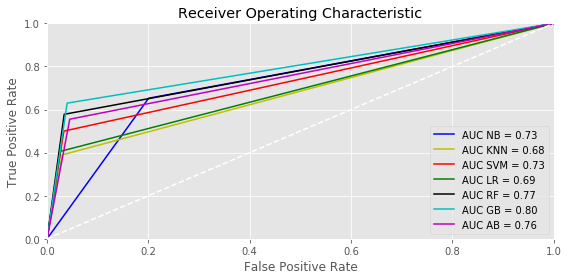

In [25]:
fpr_nb, tpr_nb, threshold_nb = metrics.roc_curve(y_val, nbm_pred)
roc_auc_nb = metrics.auc(fpr_nb, tpr_nb)
fpr_knn, tpr_knn, threshold_knn = metrics.roc_curve(y_val, knn_grid_pred)
roc_auc_knn = metrics.auc(fpr_knn, tpr_knn)
fpr_svm, tpr_svm, threshold_svm = metrics.roc_curve(y_val, svm_grid_pred)
roc_auc_svm = metrics.auc(fpr_svm, tpr_svm)
fpr_lrm, tpr_lrm, threshold_lrm = metrics.roc_curve(y_val, lrm_grid_pred)
roc_auc_lrm = metrics.auc(fpr_lrm, tpr_lrm)
fpr_rfm, tpr_rfm, threshold_rfm = metrics.roc_curve(y_val, rfm_grid_pred)
roc_auc_rfm = metrics.auc(fpr_rfm, tpr_rfm)
fpr_gbm, tpr_gbm, threshold_gbm = metrics.roc_curve(y_val, gbm_pred)
roc_auc_gbm = metrics.auc(fpr_gbm, tpr_gbm)
fpr_abm, tpr_abm, threshold_abm = metrics.roc_curve(y_val, abm_grid_pred)
roc_auc_abm = metrics.auc(fpr_abm, tpr_abm)

fig = plt.figure(figsize=(8, 4))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_nb, tpr_nb, 'b', label = 'AUC NB = %0.2f' % roc_auc_nb)
plt.plot(fpr_knn, tpr_knn, 'y', label = 'AUC KNN = %0.2f' % roc_auc_knn)
plt.plot(fpr_svm, tpr_svm, 'r', label = 'AUC SVM = %0.2f' % roc_auc_svm)
plt.plot(fpr_lrm, tpr_lrm, 'g', label = 'AUC LR = %0.2f' % roc_auc_lrm)
plt.plot(fpr_rfm, tpr_rfm, 'k', label = 'AUC RF = %0.2f' % roc_auc_rfm)
plt.plot(fpr_gbm, tpr_gbm, 'c', label = 'AUC GB = %0.2f' % roc_auc_gbm)
plt.plot(fpr_abm, tpr_abm, 'm', label = 'AUC AB = %0.2f' % roc_auc_abm)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'w--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.tight_layout()
plt.show()

위에서 계산된 분류 메트릭에 따르면 **Gradient Boosting** 분류기가 가장 높은 성능을 보이는 분류기이므로 계속 선택할 것이다.

### 3.2 Best Model Further Tuning 

In [103]:
gbm2 = GradientBoostingClassifier(loss='deviance',
    learning_rate=0.1,
    n_estimators=131,
    subsample=1.0,
    criterion='friedman_mse',
    min_samples_split=2,
    min_samples_leaf=1,
    max_depth=3,
    max_features=None) #default parameters
gbm2.fit(X_train,y_train)
gbm2_pred = gbm2.predict(X_val)

print('Gradient Boost Performance test :')
print('---------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_val, gbm2_pred))
print('F1 Score        : ', metrics.f1_score(y_val, gbm2_pred))
print('Precision       : ', metrics.precision_score(y_val, gbm2_pred))
print('Recall          : ', metrics.recall_score(y_val, gbm2_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_val, gbm2_pred))

Gradient Boost Performance test :
---------------------------------
Accuracy        :  0.9069767441860465
F1 Score        :  0.6950354609929078
Precision       :  0.765625
Recall          :  0.6363636363636364
Confusion Matrix:
  [[1481   60]
 [ 112  196]]


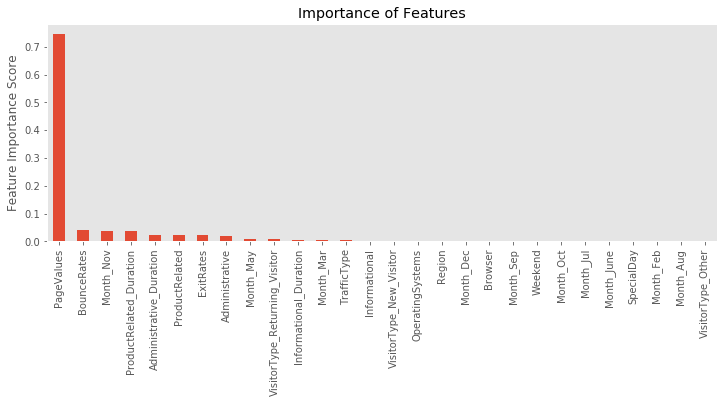

In [102]:
feat_imp = pd.Series(gbm2.feature_importances_, list(X_train)).sort_values(ascending=False)
fig = plt.figure(figsize=(12, 4))
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
plt.grid()
plt.show()

### 3.3 Measuring True Performance - test dataset

In [105]:
gb = GradientBoostingClassifier(loss='deviance',
    learning_rate=0.1,
    n_estimators=131,
    subsample=1.0,
    criterion='friedman_mse',
    min_samples_split=2,
    min_samples_leaf=1,
    max_depth=3,
    max_features=None) #final parameters
gb.fit(X_train,y_train)
gb_pred = gb.predict(X_test)

print('Gradient Boost: Final  ClassificationPerformance test :')
print('-------------------------------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_test, gb_pred))
print('F1 Score        : ', metrics.f1_score(y_test, gb_pred))
print('Precision       : ', metrics.precision_score(y_test, gb_pred))
print('Recall          : ', metrics.recall_score(y_test, gb_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_test, gb_pred))
print(classification_report(y_test, gb_pred, target_names=['Rev=0', 'Rev=1']))

Gradient Boost: Final  ClassificationPerformance test :
-------------------------------------------------------
Accuracy        :  0.9086486486486487
F1 Score        :  0.6572008113590264
Precision       :  0.7012987012987013
Recall          :  0.6183206106870229
Confusion Matrix:
  [[1519   69]
 [ 100  162]]
              precision    recall  f1-score   support

       Rev=0       0.94      0.96      0.95      1588
       Rev=1       0.70      0.62      0.66       262

    accuracy                           0.91      1850
   macro avg       0.82      0.79      0.80      1850
weighted avg       0.90      0.91      0.91      1850



### Step 4  Conclusion

Naive Bayes, KNN, SVM, Logistic Regression, Random Forest, Gradiant Boosting, and Adaboosting을 테스트하고 최적화한 결과, 그라디언트 부스트 분류기가 가장 우수한 분류 성능을 보였고, 그 다음 랜덤 포레스트, 아다부스트 순으로 우수한 분류 성능을 달성한다.
최적한 모델: Gradiant Boost 이다.

최고의 분류 성능:

정확도: 91%

F1 점수: 0.66

두 클래스 간 분류 성능에는 분명한 차이가 있는데, 이는 데이터 포인트의 약 85%가 한 클래스에 속하고 15% 미만이 다른 클래스에 속하는 데이터 세트의 불균형한 특성 때문인 것으로 보이다. 

